In [227]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.svm import SVR, LinearSVR
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV, RepeatedKFold, cross_val_score, cross_validate
from sklearn.datasets import make_regression
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, mutual_info_regression, f_regression
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import scipy.stats as stats
from math import sqrt
import matplotlib.pyplot as plt
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, mutual_info_regression
from sklearn.model_selection import RepeatedKFold, cross_validate
from sklearn.metrics import make_scorer, mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVR
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from math import sqrt
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from math import sqrt



## Load data

In [203]:
df_cleaned = pd.read_csv('df_withmissing.csv')
df_cleaned['Year'] = df_cleaned['Year'].astype('object')
df_cleaned.dropna(inplace=True)



categorical_vars = ["Entity", "Year"]
one_hot_encoder = OneHotEncoder(sparse=False, drop = "first")
encoder_vars_array = one_hot_encoder.fit_transform(df_cleaned[categorical_vars])
encoder_feature_names = one_hot_encoder.get_feature_names_out(categorical_vars)
encoder_vars_df = pd.DataFrame(encoder_vars_array, columns = encoder_feature_names)
df_cleaned_new = pd.concat([df_cleaned.reset_index(drop=True), encoder_vars_df.reset_index(drop=True)], axis = 1)
df_cleaned_new.drop(categorical_vars, axis = 1, inplace = True)


from sklearn.model_selection import train_test_split
target = df_cleaned_new['Value_co2_emissions_kt_by_country']
df_cleaned_new.drop(columns=['Value_co2_emissions_kt_by_country'], inplace=True)
x_train, x_test, y_train, y_test = train_test_split(df_cleaned_new, target, test_size=0.2, random_state=2024, shuffle=True)





/usr/local/insa/anaconda/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


##  Performing one-hot encoding on categorical variables

## Split data into training set and test set

## Initial all the metrics to assess the model’s performance

In [204]:
mse_scores = {}
mae_scores = {}
r2_scores = {}

## Linear Regresion

https://machinelearningmastery.com/feature-selection-for-regression-data/

In [205]:
model_linear_reg = make_pipeline(
    StandardScaler(),  
    LinearRegression()  )
model_linear_reg.fit(x_train, y_train)


y_pred = model_linear_reg.predict(x_test)
# Calculate the preformance
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
#Store the performent
mse_scores["Linear_regresion"] = mse
mae_scores["Linear_regresion"] = mae
r2_scores["Linear_regresion"] = r2
# Print out performance
print(f"Linear Regression: MSE: {mse}, MAE: {mae}, R²: {r2}\n")

Linear Regression: MSE: 1944822379.0934122, MAE: 14710.208610779044, R²: 0.9972678452364961



Features sorted by p-values (descending):
Electricity from fossil fuels (TWh): F-statistic = 125054.082, p-value = 0.000e+00 (significant)
Electricity from renewables (TWh): F-statistic = 6578.638, p-value = 0.000e+00 (significant)
Entity_China: F-statistic = 3685.867, p-value = 0.000e+00 (significant)
Land Area(Km2): F-statistic = 1467.621, p-value = 9.614e-247 (significant)
Electricity from nuclear (TWh): F-statistic = 1134.086, p-value = 4.554e-201 (significant)
Entity_United States: F-statistic = 676.173, p-value = 2.674e-130 (significant)
Renewable energy share in the total final energy consumption (%): F-statistic = 51.045, p-value = 1.220e-12 (significant)
Entity_India: F-statistic = 41.310, p-value = 1.586e-10 (significant)
Access to electricity (% of population): F-statistic = 40.842, p-value = 2.006e-10 (significant)
Latitude: F-statistic = 32.247, p-value = 1.536e-08 (significant)
Entity_Japan: F-statistic = 29.043, p-value = 7.829e-08 (significant)
gdp_per_capita: F-statist

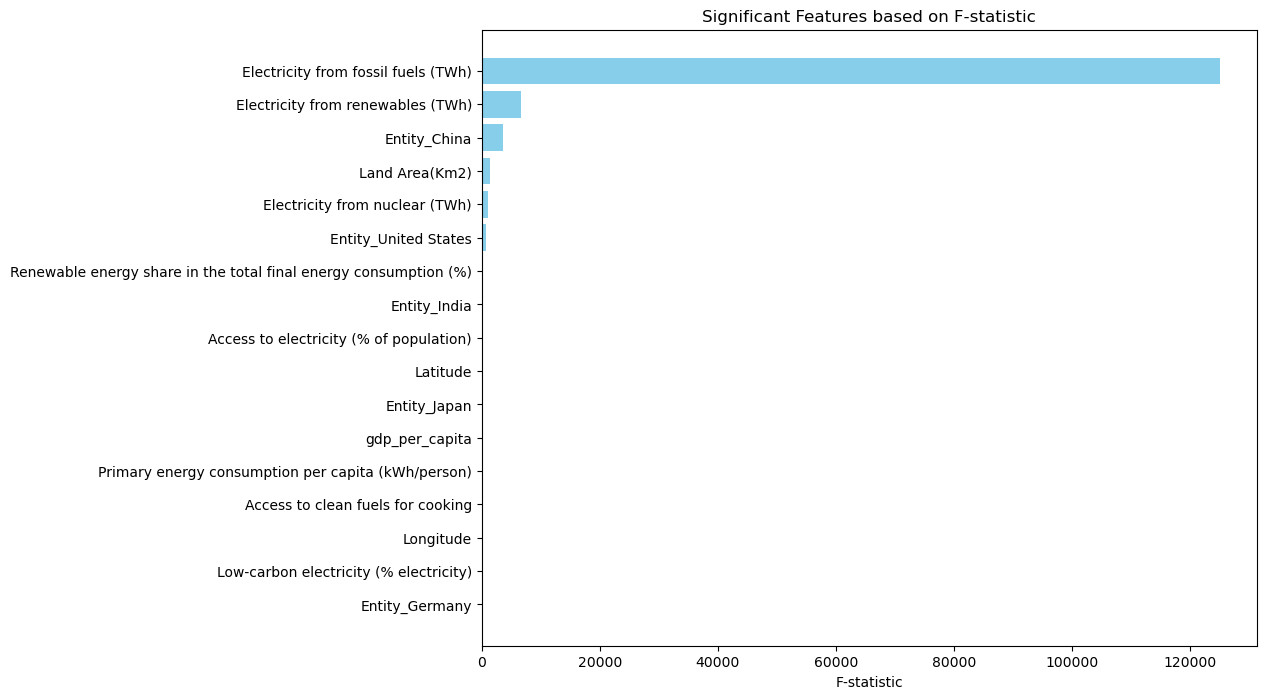

In [206]:

feature_names = df_cleaned_new.columns[:-1] 
f_statistic, p_values = f_regression(x_train, y_train)

# Combine feature names, F-statistics, and p-values into a list of tuples
feature_stats = [(feature_names[i], f_statistic[i], p_values[i]) for i in range(len(feature_names))]

# Sort the list of tuples by p-value in descending order
sorted_feature_stats = sorted(feature_stats, key=lambda x: x[2], reverse=False)

# Define the p-value threshold for significance
p_value_threshold = 0.05

print("Features sorted by p-values (descending):")
for feature, f_stat, p_val in sorted_feature_stats:
    significance = "(significant)" if p_val < p_value_threshold else "(not significant)"
    print(f"{feature}: F-statistic = {f_stat:.3f}, p-value = {p_val:.3e} {significance}")


# Filter to include only significant features based on the p-value threshold
significant_features = [feat for feat in sorted_feature_stats if feat[2] < p_value_threshold]

# If you prefer to plot using inverse p-values to highlight significance, you can calculate those
# significant_features = [(feat[0], 1/feat[2], feat[2]) for feat in sorted_feature_stats if feat[2] < p_value_threshold]

# Separate the feature names, F-statistics (or inverse p-values), and p-values for plotting
feature_names = [feat[0] for feat in significant_features]
f_statistics = [feat[1] for feat in significant_features]  # Use this line if using F-statistics
# f_statistics = [feat[1] for feat in significant_features]  # Use this line if using inverse p-values
p_values = [feat[2] for feat in significant_features]

# Plotting
plt.figure(figsize=(10, 8))
plt.barh(feature_names, f_statistics, color='skyblue')  # Use f_statistics or inverse p-values here
plt.xlabel('F-statistic')  # Change to 'Inverse P-value' if plotting inverse p-values
plt.title('Significant Features based on F-statistic')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest value at the top
plt.show()

In [207]:
# feature selection
def select_features(X_train, y_train, X_test):
 # configure to select a subset of features
 fs = SelectKBest(score_func=mutual_info_regression, k=156)
 # learn relationship from training data
 fs.fit(X_train, y_train)
 # transform train input data
 X_train_fs = fs.transform(X_train)
 # transform test input data
 X_test_fs = fs.transform(X_test)
 return X_train_fs, X_test_fs, fs
x_train_fs, x_test_fs, fs = select_features(x_train, y_train, x_test)

model_linear_reg = make_pipeline(
    StandardScaler(),  
    LinearRegression()  )
model_linear_reg.fit(x_train_fs, y_train)

y_pred = model_linear_reg.predict(x_test_fs)

# Calculate the preformance
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = sqrt(mse)
r2 = r2_score(y_test, y_pred)
#Store the performent
mse_scores["Linear_reg_feature"] = mse
mae_scores["Linear_reg_feature"] = mae
r2_scores["Linear_reg_feature"] = r2
# Print out performance
print(f"Linear Regression feature: MSE: {mse}, MAE: {mae}, R²: {r2}\n")


Linear Regression feature: MSE: 1918962570.374946, MAE: 14457.309142464464, R²: 0.9973041740037568



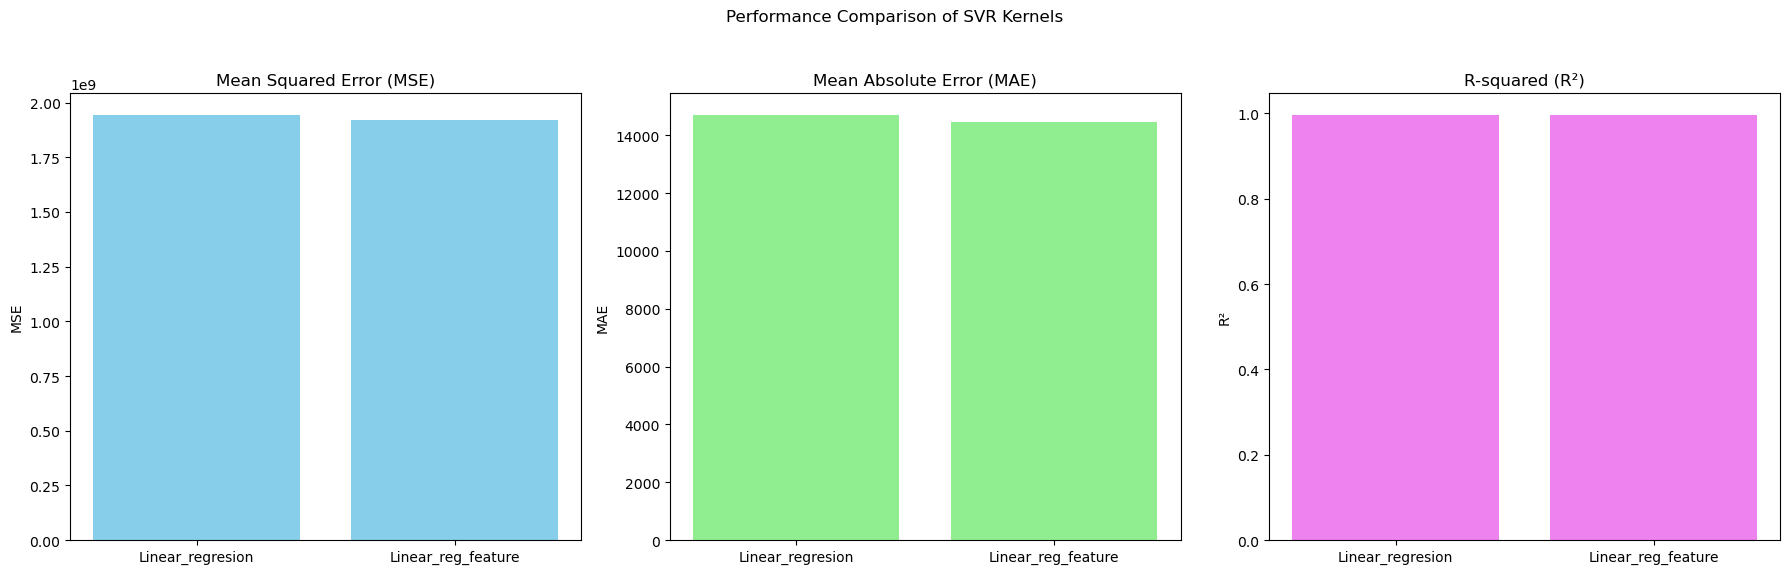

In [208]:
# Plotting the results
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))
fig.suptitle('Performance Comparison of SVR Kernels')

# Plot Mean Squared Error (MSE)
axes[0].bar(mse_scores.keys(), mse_scores.values(), color='skyblue')
axes[0].set_title('Mean Squared Error (MSE)')
axes[0].set_ylabel('MSE')

# Plot Mean Absolute Error (MAE)
axes[1].bar(mae_scores.keys(), mae_scores.values(), color='lightgreen')
axes[1].set_title('Mean Absolute Error (MAE)')
axes[1].set_ylabel('MAE')

# Plot R-squared (R²)
axes[2].bar(r2_scores.keys(), r2_scores.values(), color='violet')
axes[2].set_title('R-squared (R²)')
axes[2].set_ylabel('R²')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()



In [188]:

num_features = [i for i in range(x_train.shape[1]-25, x_train.shape[1]+1)]

mse_results = []
mae_results = []
r2_results = []

for k in num_features:
    # Create pipeline
    model = LinearRegression()
    fs = SelectKBest(score_func=mutual_info_regression, k=k)
    pipeline = Pipeline(steps=[('sel', fs), ('lr', model)])
    
    # Evaluate the model
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_validate(pipeline, x_train, y_train, scoring={
                            'MSE': make_scorer(mean_squared_error, greater_is_better=False),
                            'MAE': make_scorer(mean_absolute_error, greater_is_better=False),
                            'R2': make_scorer(r2_score)},
                            cv=cv, n_jobs=-1)
    
    mse_results.append(scores['test_MSE'])
    mae_results.append(scores['test_MAE'])
    r2_results.append(scores['test_R2'])
    
    # Summarize the results
    print(f'>{k} MSE: {np.mean(scores["test_MSE"]):.3f} ({np.std(scores["test_MSE"]):.3f})')
    print(f'>{k} MAE: {np.mean(scores["test_MAE"]):.3f} ({np.std(scores["test_MAE"]):.3f})')
    print(f'>{k} R2: {np.mean(scores["test_R2"]):.5f} ({np.std(scores["test_R2"]):.5f})')

# Calculate the mean and standard deviation of the results
mean_mse = [np.mean(result) for result in mse_results]
mean_mae = [np.mean(result) for result in mae_results]
mean_r2 = [np.mean(result) for result in r2_results]
# Find the index of the best metric
best_index_mse = np.argmin(mean_mse)
best_index_mae = np.argmin(mean_mae)
best_index_r2 = np.argmax(mean_r2)

# Print the best metric and its corresponding number of features
print(f"Best MSE: {mean_mse[best_index_mse]:.3f} (Number of Features: {num_features[best_index_mse]})")
print(f"Best MAE: {mean_mae[best_index_mae]:.3f} (Number of Features: {num_features[best_index_mae]})")
print(f"Best R2: {mean_r2[best_index_r2]:.5f} (Number of Features: {num_features[best_index_r2]})")



>151 MSE: -1665588719.620 (807514106.084)
>151 MAE: -13302.707 (2082.306)
>151 R2: 0.99667 (0.00220)
>152 MSE: -1667541416.742 (807725263.066)
>152 MAE: -13309.417 (2076.246)
>152 R2: 0.99666 (0.00220)
>153 MSE: -1667163793.124 (807091164.395)
>153 MAE: -13333.336 (2074.976)
>153 R2: 0.99667 (0.00219)
>154 MSE: -1665679984.188 (807222321.105)
>154 MAE: -13320.298 (2127.870)
>154 R2: 0.99667 (0.00220)
>155 MSE: -603323815385043.875 (3248989262846107.500)
>155 MAE: -438990.069 (2292588.831)
>155 R2: -2040.23813 (10992.38641)
>156 MSE: -1665348803.975 (806358085.767)
>156 MAE: -13372.788 (2074.883)
>156 R2: 0.99667 (0.00220)
>157 MSE: -1666477023.596 (806337694.238)
>157 MAE: -13379.054 (2084.574)
>157 R2: 0.99667 (0.00219)
>158 MSE: -1665734333.567 (806094824.809)
>158 MAE: -13387.031 (2090.701)
>158 R2: 0.99667 (0.00220)
>159 MSE: -1669495763.674 (806534594.446)
>159 MAE: -13425.065 (2070.971)
>159 R2: 0.99666 (0.00220)
>160 MSE: -196350991160366560.000 (1057382438509386752.000)
>160 MA

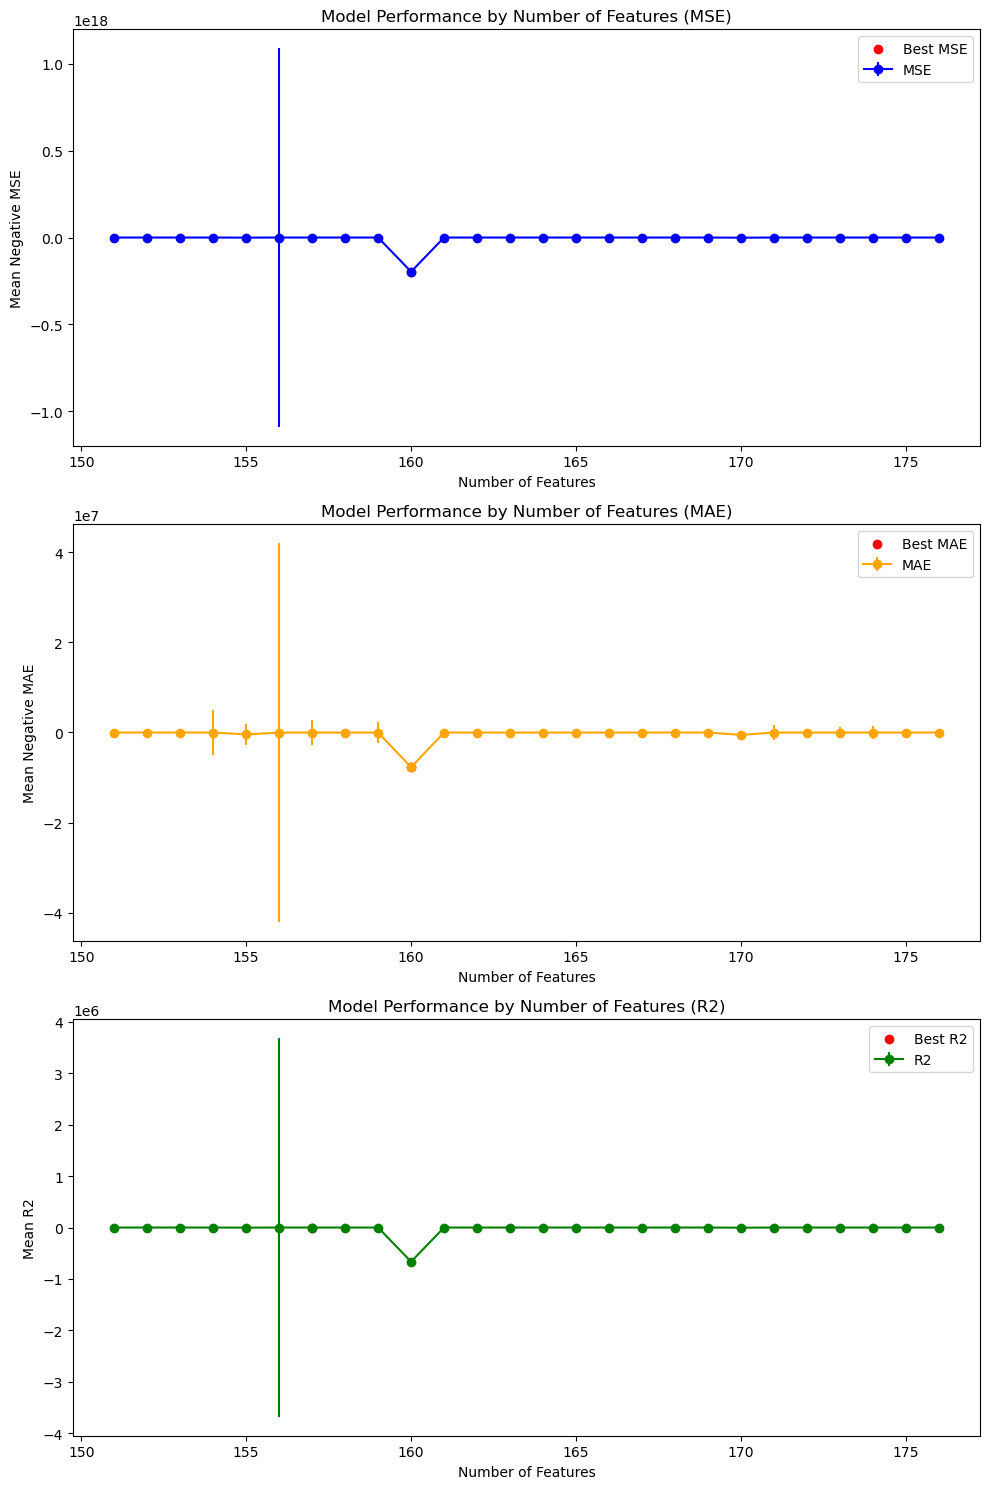

In [189]:
# Plotting MSE, MAE, and R2 results
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

# Plot for Mean Squared Error
axs[0].errorbar(num_features, mean_mse, yerr=std_mse, fmt='-o', color='blue', label='MSE')
axs[0].scatter(num_features[best_index_mse], mean_mse[best_index_mse], color='red', label='Best MSE')
axs[0].set_xlabel('Number of Features')
axs[0].set_ylabel('Mean Negative MSE')
axs[0].set_title('Model Performance by Number of Features (MSE)')
axs[0].legend()

# Plot for Mean Absolute Error
axs[1].errorbar(num_features, mean_mae, yerr=std_mae, fmt='-o', color='orange', label='MAE')
axs[1].scatter(num_features[best_index_mae], mean_mae[best_index_mae], color='red', label='Best MAE')
axs[1].set_xlabel('Number of Features')
axs[1].set_ylabel('Mean Negative MAE')
axs[1].set_title('Model Performance by Number of Features (MAE)')
axs[1].legend()

# Plot for R-squared
axs[2].errorbar(num_features, mean_r2, yerr=std_r2, fmt='-o', color='green', label='R2')
axs[2].scatter(num_features[best_index_r2], mean_r2[best_index_r2], color='red', label='Best R2')
axs[2].set_xlabel('Number of Features')
axs[2].set_ylabel('Mean R2')
axs[2].set_title('Model Performance by Number of Features (R2)')
axs[2].legend()

plt.tight_layout()
plt.show()

In [209]:

    model = LinearRegression()
    fs = SelectKBest(score_func=mutual_info_regression, k=160)
    pipeline = Pipeline(steps=[('sel', fs), ('lr', model)])
    
    # Evaluate the model
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_validate(pipeline, x_train, y_train, scoring={
                            'MSE': make_scorer(mean_squared_error, greater_is_better=False),
                            'MAE': make_scorer(mean_absolute_error, greater_is_better=False),
                            'R2': make_scorer(r2_score)},
                            cv=cv, n_jobs=-1)
    
     
#Store the performent
mse_scores["Linear_reg_fea_kfold"] = mse
mae_scores["Linear_reg_fea_kfold"] = mae
r2_scores["Linear_reg_fea_kfold"] = r2
# Print out performance
print(f"Linear Regression feature seclection and k fold cross validaiton: MSE: {mse}, MAE: {mae}, R²: {r2}\n")


Linear Regression feature seclection and k fold cross validaiton: MSE: 1918962570.374946, MAE: 14457.309142464464, R²: 0.9973041740037568



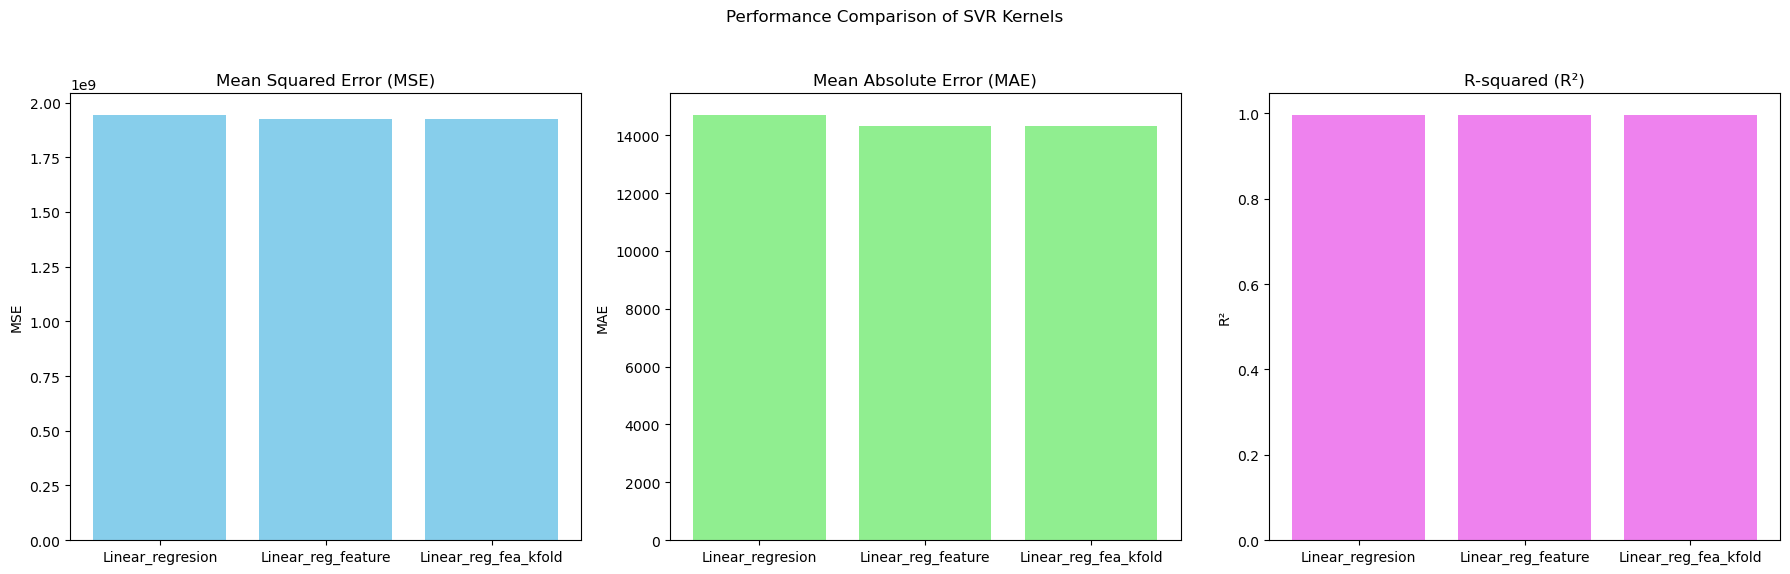

In [191]:
# Plotting the results
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))
fig.suptitle('Performance Comparison of SVR Kernels')

# Plot Mean Squared Error (MSE)
axes[0].bar(mse_scores.keys(), mse_scores.values(), color='skyblue')
axes[0].set_title('Mean Squared Error (MSE)')
axes[0].set_ylabel('MSE')

# Plot Mean Absolute Error (MAE)
axes[1].bar(mae_scores.keys(), mae_scores.values(), color='lightgreen')
axes[1].set_title('Mean Absolute Error (MAE)')
axes[1].set_ylabel('MAE')

# Plot R-squared (R²)
axes[2].bar(r2_scores.keys(), r2_scores.values(), color='violet')
axes[2].set_title('R-squared (R²)')
axes[2].set_ylabel('R²')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()



In [192]:


# Assuming x_train, y_train are defined

# Set up the parameter grid. Adjust the ranges based on your specific needs.
param_grid =  {
    'linearsvr__C': [0.01, 0.1, 1.0, 10.0, 100.0],  # Added smaller and larger values
    'linearsvr__tol': [1e-3, 1e-4, 1e-5, 1e-6, 1e-7],  # Broader range
    'linearsvr__max_iter': [1000, 5000, 10000, 50000]  # Added more options
}

# Create the pipeline
pipeline = make_pipeline(StandardScaler(), LinearSVR(random_state=0))

# Set up the grid search
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the grid search
grid_search.fit(x_train, y_train)

# Best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best parameters: {best_params}")
print(f"Best score (negative MSE): {best_score}")


/usr/local/insa/anaconda/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/insa/anaconda/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/insa/anaconda/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/insa/anaconda/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/insa/anaconda/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/insa/anaconda/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: Conv

Best parameters: {'linearsvr__C': 100.0, 'linearsvr__max_iter': 5000, 'linearsvr__tol': 1e-06}
Best score (negative MSE): -557946592076.925


In [193]:
param_grid_poly = {
    'svr__C': [0.1, 1.0, 10.0],
    'svr__degree': [2, 3, 4],  # Considering polynomial degrees 2, 3, and 4
    'svr__coef0': [0.0, 0.5, 1.0],
    'svr__epsilon': [0.1, 0.2, 0.5],
    'svr__gamma': ['scale', 'auto']  # You could also specify numeric values
}

# Create a pipeline with SVR
pipeline_poly = make_pipeline(StandardScaler(), SVR(kernel='poly'))

# Set up GridSearchCV
grid_search_poly = GridSearchCV(pipeline_poly, param_grid_poly, cv=5, scoring='neg_mean_squared_error')

# Perform the grid search
grid_search_poly.fit(x_train, y_train)

# Best parameters and score
best_params_poly = grid_search_poly.best_params_
best_score_poly = grid_search_poly.best_score_

print(f"Best parameters for poly kernel: {best_params_poly}")
print(f"Best score (negative MSE) for poly kernel: {best_score_poly}")


Best parameters for poly kernel: {'svr__C': 10.0, 'svr__coef0': 1.0, 'svr__degree': 4, 'svr__epsilon': 0.5, 'svr__gamma': 'scale'}
Best score (negative MSE) for poly kernel: -708909858562.862


In [24]:


# Define a parameter distribution
param_distributions = {
    'linearsvr__C': stats.uniform(0.01, 100),  # Uniform distribution over [0.01, 100.01]
    'linearsvr__tol': stats.loguniform(1e-6, 1e-3),  # Log-uniform distribution
    'linearsvr__max_iter': stats.randint(1000, 20000)  # Uniform distribution of integers
}

# Create a pipeline
pipeline = make_pipeline(StandardScaler(), LinearSVR(random_state=0))

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(pipeline, param_distributions, n_iter=100, cv=5, 
                                    scoring='neg_mean_squared_error', random_state=0)

# Fit RandomizedSearchCV to the data
random_search.fit(x_train, y_train)

# Best parameters and score
best_params = random_search.best_params_
best_score = random_search.best_score_

print(f"Best parameters: {best_params}")
print(f"Best score (negative MSE): {best_score}")


Best parameters: {'linearsvr__C': 99.89470065678665, 'linearsvr__max_iter': 16997, 'linearsvr__tol': 0.000517539179101534}
Best score (negative MSE): -558097575958.9357


In [30]:
# Assuming x_train, y_train are your training data and labels

# Define the parameter grid to search
param_grid_rbf = {
    'svr__C': [0.1, 1, 10, 100,1000],
    'svr__gamma': [1e-3, 1e-4, 'scale', 'auto'],  # You can include both float values and 'scale'/'auto'
    'svr__epsilon': [0.01, 0.1, 0.2, 0.5, 0.7, 1]
}

# Create a pipeline with an SVR model
pipeline_rbf = make_pipeline(StandardScaler(), SVR(kernel='rbf'))

# Set up the GridSearchCV
grid_search_rbf = GridSearchCV(pipeline_rbf, param_grid_rbf, cv=5, scoring='neg_mean_squared_error')

# Perform the grid search
grid_search_rbf.fit(x_train, y_train)

# Extract the best parameters and the corresponding score
best_params_rbf = grid_search_rbf.best_params_
best_score_rbf = grid_search_rbf.best_score_

print(f"Best parameters for RBF kernel: {best_params_rbf}")
print(f"Best score (negative MSE) for RBF kernel: {best_score_rbf}")


Best parameters for RBF kernel: {'svr__C': 1000, 'svr__epsilon': 1, 'svr__gamma': 'scale'}
Best score (negative MSE) for RBF kernel: -706879796085.8707


In [210]:

kernels = ['linear', 'poly', 'rbf', 'sigmoid']
# Dictionaries to store metrics for each kernel

c =500
for kernel in kernels:
    print(f"Training and evaluating model with '{kernel}' kernel.")
    if kernel == 'Svr_linear':
        # Specified hyperparameters for LinearSVR
        regr = make_pipeline(StandardScaler(), LinearSVR(C =c, tol=0.000517539179101534, 
                                                        max_iter=16997, random_state=0))
    elif kernel == 'Svr_poly':
        # Specified hyperparameters for SVR with poly kernel
        regr = make_pipeline(StandardScaler(), SVR(kernel='poly', 
                                                   C=c, coef0=1.0, degree=5, epsilon=0.5, gamma='scale'))
    elif kernel == 'Svr_rbf':
        # Specified hyperparameters for SVR with rbf kernel
        regr = make_pipeline(StandardScaler(), SVR(kernel='rbf', C=c, epsilon=1))
    else:
        # Specified hyperparameters for SVR with sigmoid kernel
        regr = make_pipeline(StandardScaler(), SVR(kernel=kernel, C=c, epsilon=1, gamma='scale'))

    # Train the model
    regr.fit(x_train, y_train)
    
    # Evaluate the model
    y_pred = regr.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    # Store the metrics
    mse_scores['svr_'+kernel] = mse
    mae_scores['svr_'+kernel] = mae
    rmse_scores['svr_'+kernel] = rmse
    r2_scores['svr_'+kernel] = r2

    print(f"Kernel: {kernel}, MSE: {mse}, MAE: {mae}, RMSE: {rmse}, R²: {r2}\n")



Training and evaluating model with 'linear' kernel.
Kernel: linear, MSE: 143379141522.52435, MAE: 57567.85235858491, RMSE: 378654.38267967314, R²: 0.7985759477528906

Training and evaluating model with 'poly' kernel.
Kernel: poly, MSE: 732166078792.2207, MAE: 188022.63011480594, RMSE: 855667.0373411732, R²: -0.028572614832105714

Training and evaluating model with 'rbf' kernel.
Kernel: rbf, MSE: 742818221646.2509, MAE: 188048.7971507379, RMSE: 861869.0281279696, R²: -0.0435371191246412

Training and evaluating model with 'sigmoid' kernel.
Kernel: sigmoid, MSE: 734127654426.4788, MAE: 184181.12922009084, RMSE: 856812.4966563447, R²: -0.0313283051566946



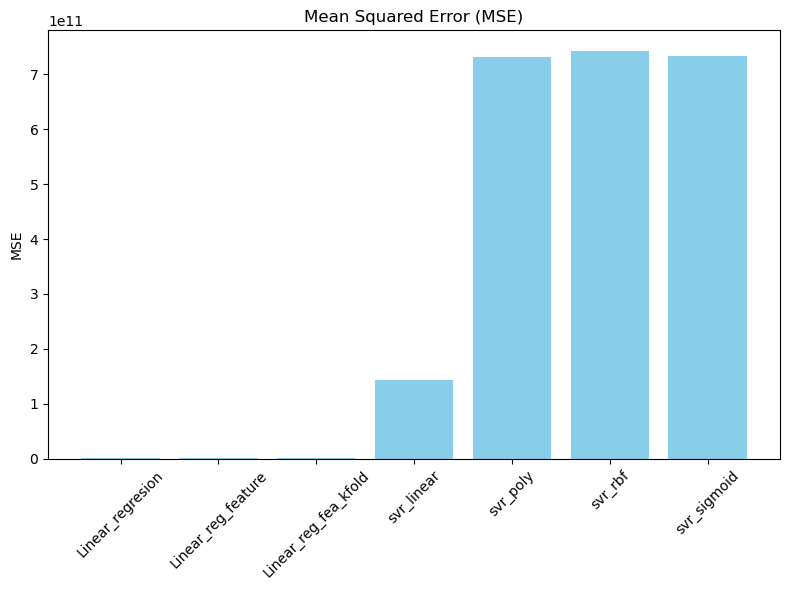

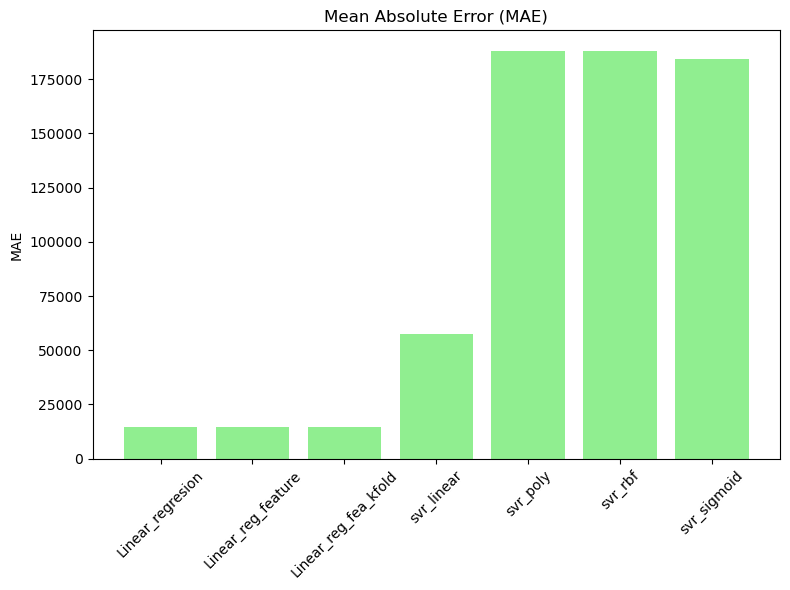

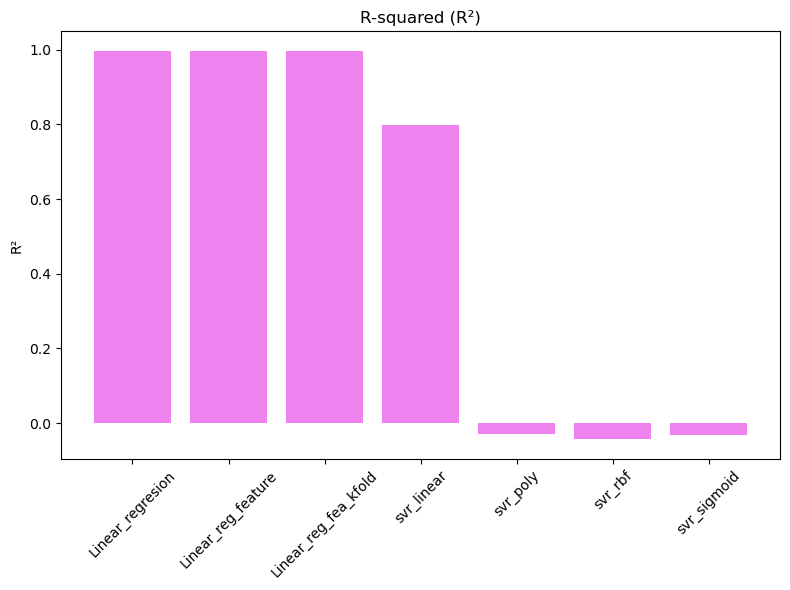

In [211]:
# Plot Mean Squared Error (MSE)
plt.figure(figsize=(8, 6))
plt.bar(mse_scores.keys(), mse_scores.values(), color='skyblue')
plt.title('Mean Squared Error (MSE)')
plt.ylabel('MSE')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

# Plot Mean Absolute Error (MAE)
plt.figure(figsize=(8, 6))
plt.bar(mae_scores.keys(), mae_scores.values(), color='lightgreen')
plt.title('Mean Absolute Error (MAE)')
plt.ylabel('MAE')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

# Plot R-squared (R²)
plt.figure(figsize=(8, 6))
plt.bar(r2_scores.keys(), r2_scores.values(), color='violet')
plt.title('R-squared (R²)')
plt.ylabel('R²')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()




In [217]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

# Define a more complex model
model_complex = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer for regression
])

# Compile the model
model_complex.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# Train the model
history_complex = model_complex.fit(X_train_scaled, y_train, validation_split=0.2, epochs=100, batch_size=32, verbose=1)

# Evaluate the model
y_pred_complex = model_complex.predict(X_test_scaled).flatten()

# Calculate evaluation metrics
mse_complex = mean_squared_error(y_test, y_pred_complex)
mae_complex = mean_absolute_error(y_test, y_pred_complex)
rmse_complex = sqrt(mse_complex)
r2_complex = r2_score(y_test, y_pred_complex)

# Print the metrics
print(f"Complex Model - Mean Absolute Error (MAE): {mae_complex}")
print(f"Complex Model - Mean Squared Error (MSE): {mse_complex}")
print(f"Complex Model - R-squared (R²): {r2_complex}")

# Optional: Plotting the Training


2024-02-26 16:29:31.191098: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


Epoch 1/100
56/56 [==============================] - 2s 11ms/step - loss: 723840270336.0000 - val_loss: 682198368256.0000
Epoch 2/100
56/56 [==============================] - 0s 6ms/step - loss: 723775717376.0000 - val_loss: 682033872896.0000
Epoch 3/100
56/56 [==============================] - 0s 6ms/step - loss: 723188449280.0000 - val_loss: 681020227584.0000
Epoch 4/100
56/56 [==============================] - 0s 5ms/step - loss: 720704503808.0000 - val_loss: 677536137216.0000
Epoch 5/100
56/56 [==============================] - 0s 8ms/step - loss: 713987915776.0000 - val_loss: 669801971712.0000
Epoch 6/100
56/56 [==============================] - 0s 6ms/step - loss: 701073653760.0000 - val_loss: 654964097024.0000
Epoch 7/100
56/56 [==============================] - 0s 5ms/step - loss: 677765120000.0000 - val_loss: 629810921472.0000
Epoch 8/100
56/56 [==============================] - 0s 6ms/step - loss: 640789643264.0000 - val_loss: 595519340544.0000
Epoch 9/100
56/56 [============

Epoch 69/100
56/56 [==============================] - 0s 7ms/step - loss: 10557039616.0000 - val_loss: 15856894976.0000
Epoch 70/100
56/56 [==============================] - 0s 6ms/step - loss: 23275827200.0000 - val_loss: 16545452032.0000
Epoch 71/100
56/56 [==============================] - 1s 9ms/step - loss: 14655243264.0000 - val_loss: 15137840128.0000
Epoch 72/100
56/56 [==============================] - 0s 7ms/step - loss: 16994360320.0000 - val_loss: 14881009664.0000
Epoch 73/100
56/56 [==============================] - 0s 6ms/step - loss: 13395662848.0000 - val_loss: 15167196160.0000
Epoch 74/100
56/56 [==============================] - 0s 8ms/step - loss: 16547951616.0000 - val_loss: 14577806336.0000
Epoch 75/100
56/56 [==============================] - 0s 7ms/step - loss: 16168466432.0000 - val_loss: 13976624128.0000
Epoch 76/100
56/56 [==============================] - 0s 6ms/step - loss: 15192256512.0000 - val_loss: 14689887232.0000
Epoch 77/100
56/56 [====================

In [225]:
mse_scores.pop('svr_' + 'poly', None)
mae_scores.pop('svr_' + 'poly', None)
r2_scores.pop('svr_' + 'poly', None)

mse_scores.pop('svr_' + 'rbf', None)
mae_scores.pop('svr_' + 'rbf', None)
r2_scores.pop('svr_' + 'rbf', None)

mse_scores.pop('svr_' + 'simog', None)
mae_scores.pop('svr_' + 'sigmoid', None)
r2_scores.pop('svr_' + 'sigmoid', None)

    
mse_scores['network'] = mse_complex
mae_scores['network'] = mae_complex
rmse_scores['network'] = rmse_complex
r2_scores['network'] = r2_complex

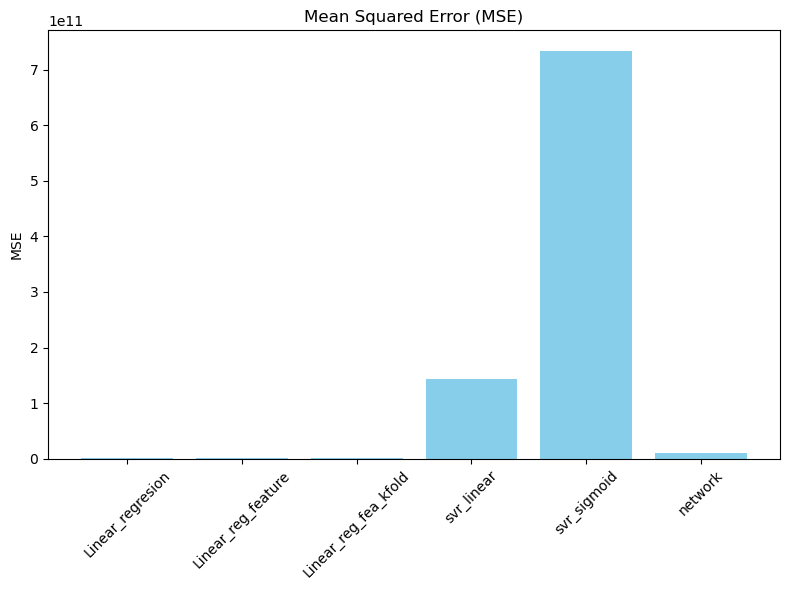

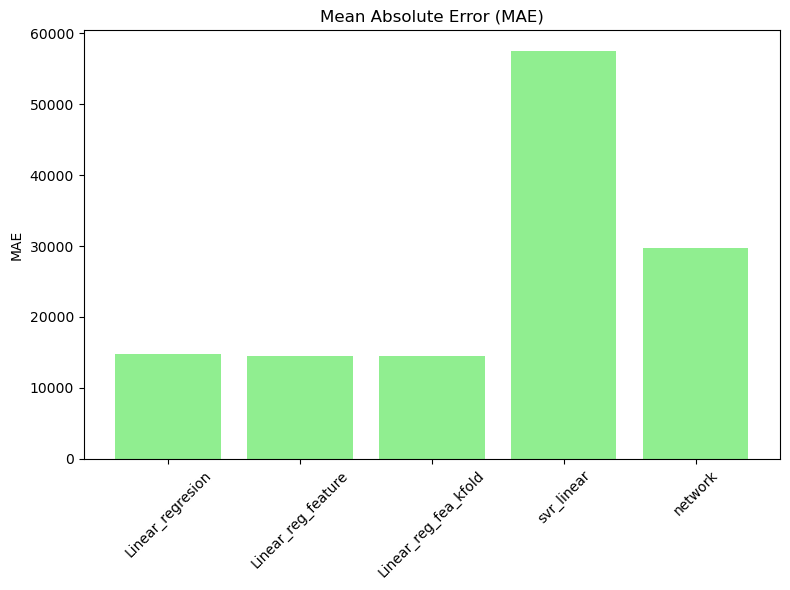

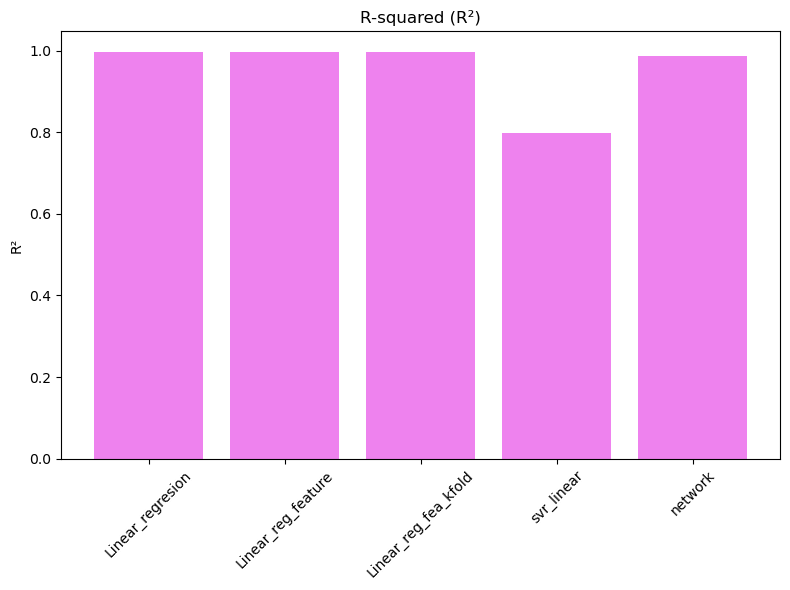

In [226]:

# Plot Mean Squared Error (MSE)
plt.figure(figsize=(8, 6))
plt.bar(mse_scores.keys(), mse_scores.values(), color='skyblue')
plt.title('Mean Squared Error (MSE)')
plt.ylabel('MSE')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

# Plot Mean Absolute Error (MAE)
plt.figure(figsize=(8, 6))
plt.bar(mae_scores.keys(), mae_scores.values(), color='lightgreen')
plt.title('Mean Absolute Error (MAE)')
plt.ylabel('MAE')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

# Plot R-squared (R²)
plt.figure(figsize=(8, 6))
plt.bar(r2_scores.keys(), r2_scores.values(), color='violet')
plt.title('R-squared (R²)')
plt.ylabel('R²')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()




In [231]:
param_distributions = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

rf_random_search = RandomizedSearchCV(estimator=RandomForestRegressor(random_state=42),
                                      param_distributions=param_distributions,
                                      n_iter=100,
                                      cv=5,
                                      verbose=2,
                                      random_state=42,
                                      n_jobs=-1)

rf_random_search.fit(x_train, y_train)
best_params = rf_random_search.best_params_
print("Best parameters found for Random Forest: ", best_params)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/usr/local/insa/anaconda/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/insa/anaconda/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/insa/anaconda/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also th

/usr/local/insa/anaconda/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/insa/anaconda/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/insa/anaconda/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also th

/usr/local/insa/anaconda/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/insa/anaconda/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/insa/anaconda/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also th

/usr/local/insa/anaconda/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/insa/anaconda/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/insa/anaconda/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also th

/usr/local/insa/anaconda/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/insa/anaconda/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/insa/anaconda/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also th

/usr/local/insa/anaconda/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/insa/anaconda/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/insa/anaconda/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also th

[CV] END max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.8s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   2.8s
[CV] END max_depth=50, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=400; total time=   1.4s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   3.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   1.0s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.6s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.6s
[CV] END max_depth=10, max_features=lo

/usr/local/insa/anaconda/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/insa/anaconda/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/insa/anaconda/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also th

[CV] END max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.9s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   2.7s
[CV] END max_depth=50, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=400; total time=   1.4s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   2.9s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.9s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   1.0s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.6s
[CV] END max_depth=30, max_features=

In [236]:
# Initialize the Random Forest regressor with the best parameters
best_params_rf = {
    'n_estimators': 400,
    'min_samples_split': 2,
    'min_samples_leaf': 1,
    'max_features': 'sqrt',
    'max_depth': 30
}

rf_regressor = RandomForestRegressor(**best_params_rf, random_state=42)

# Train the Random Forest model on the training data
rf_regressor.fit(x_train, y_train)

# Predict the target variable on the test data
y_pred = rf_regressor.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse_scores['Rand_forest'] = mse
mae_scores['Rand_forest'] = mae
r2_scores['Rand_forest'] = r2

print(f"Random forest: , MSE: {mse}, MAE: {mae}, RMSE: {rmse}, R²: {r2}\n")

[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   8.1s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=500; total time=   2.0s
[CV] END max_depth=40, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=500; total time=   2.1s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   1.1s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   1.0s
[CV] END max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=  12.6s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=   2.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.8s
[CV] END max_depth=30, max_features=sqr

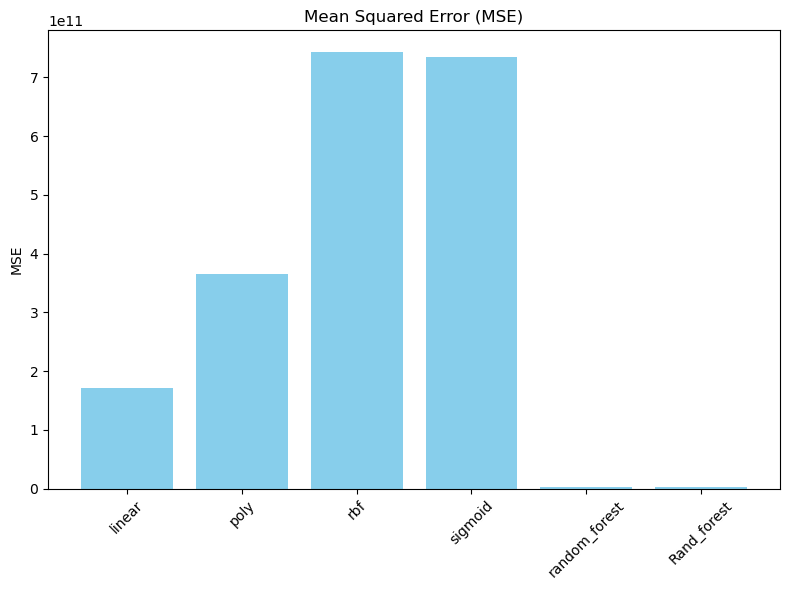

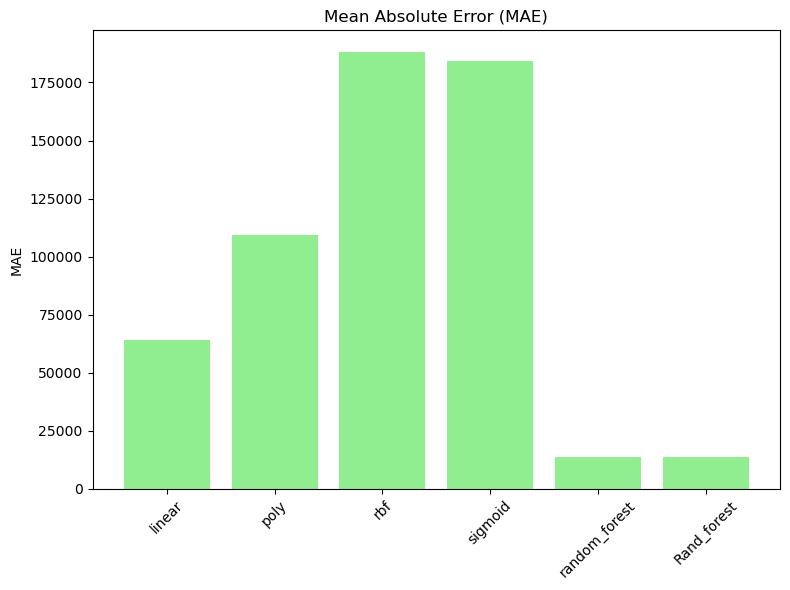

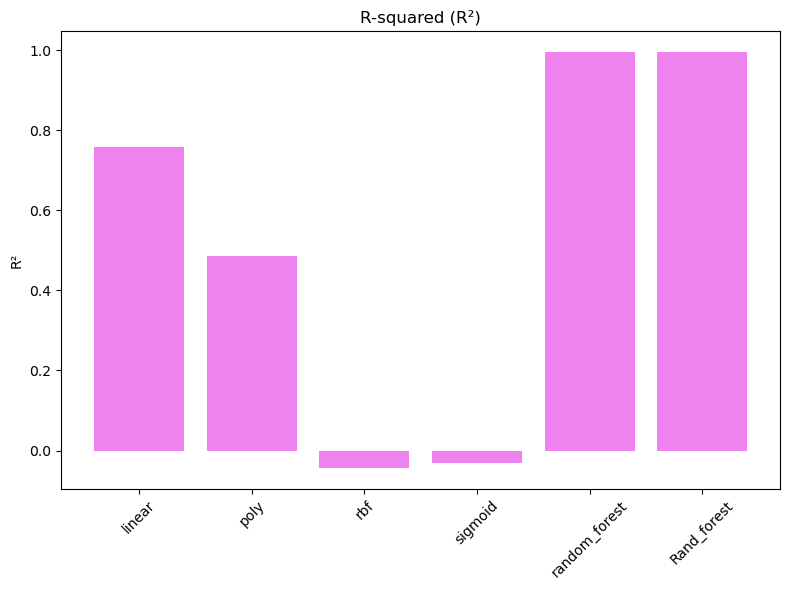

In [237]:

# Plot Mean Squared Error (MSE)
plt.figure(figsize=(8, 6))
plt.bar(mse_scores.keys(), mse_scores.values(), color='skyblue')
plt.title('Mean Squared Error (MSE)')
plt.ylabel('MSE')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

# Plot Mean Absolute Error (MAE)
plt.figure(figsize=(8, 6))
plt.bar(mae_scores.keys(), mae_scores.values(), color='lightgreen')
plt.title('Mean Absolute Error (MAE)')
plt.ylabel('MAE')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

# Plot R-squared (R²)
plt.figure(figsize=(8, 6))
plt.bar(r2_scores.keys(), r2_scores.values(), color='violet')
plt.title('R-squared (R²)')
plt.ylabel('R²')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()